In [13]:
import pandas as pd
import numpy as np

# Data pre-processing
import nltk
# List of stop words used for data pre-processing
from stop_words_list import stop_words_list
from nltk.corpus import stopwords

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Topics modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [14]:
# listOfCreatorSamples: "MKBHD, Jeremy Jahns, James Charles"
creator = "Jeremy Jahns"
output_df = pd.read_excel(f"./comments_spreadsheets/sample_extracted_comments_{creator}.xlsx")

In [15]:
duplicates = output_df[output_df.duplicated(("Comments"))]
print ("Count of duplicate comments in dataframe"
, duplicates.shape[0])

print ("Count of unique comments in dataframe"
, output_df.shape[0] - duplicates.shape[0])

# Remove duplicated comments from dataset
unique_df = output_df.drop_duplicates(subset=["Comments"], keep='first')
df = unique_df.reset_index()

# Removes line return "\n"
df = df.replace(r'\n',' ', regex=True)

display(df)

Count of duplicate comments in dataframe 0
Count of unique comments in dataframe 99


,index,Video ID,Comment ID,Comments,Actual Polarity
0,0,zYVgbAF-JIs,UgwCqrMbr7-4PlQA2894AaABAg,I would’ve watched another 2-3 hours easily. I...,Positive
1,1,zYVgbAF-JIs,UgzlbXms2Tcf36z4Evl4AaABAg,"""If Dune: Part Two doesn't happen.... I'm gonn...",Positive
2,2,zYVgbAF-JIs,Ugy05LD0V-K45HkE4hh4AaABAg,"Looks like Dune 2 is, “all but confirmed”. It ...",Positive
3,3,zYVgbAF-JIs,Ugwqtr6POFO9ZKrBVVR4AaABAg,I went to Dune with my wife and she's usually ...,Positive
4,4,zYVgbAF-JIs,Ugzounld_ZUlv5bDOQV4AaABAg,Now I understood what the spice mines are when...,Neutral
...,...,...,...,...,...
94,94,zYVgbAF-JIs,UgxWeWzFKeDGXL-iO1p4AaABAg,Watching this movie was like playing an old vi...,Neutral
95,95,zYVgbAF-JIs,UgwlKODPCb8cuX3bMNZ4AaABAg,After a second watch and then listening to the...,Positive
96,96,zYVgbAF-JIs,UgyVIAVQFPcyiACyc_V4AaABAg,Dude before I watched this I was like “this wa...,Negative
97,97,zYVgbAF-JIs,UgxzzYhsksQNpXp4yBx4AaABAg,"Watched in IMAX, truly a unique cinematic expe...",Positive


# Sentiment Analysis

In [18]:
sentimentAnalyser = SentimentIntensityAnalyzer()
sentimentScoreList = []
sentimentLabelList = []

for i in df["Comments"].values.tolist():
    sentimentScore = sentimentAnalyser.polarity_scores(i)

    if sentimentScore['compound'] >= 0.05:
        sentimentScoreList.append(sentimentScore['compound'])
        sentimentLabelList.append('Positive')
    elif sentimentScore['compound'] > -0.05 and sentimentScore['compound'] < 0.05:
        sentimentScoreList.append(sentimentScore['compound'])
        sentimentLabelList.append('Neutral')
    elif sentimentScore['compound'] <= -0.05:
        sentimentScoreList.append(sentimentScore['compound'])
        sentimentLabelList.append('Negative')

df["Sentiment"] = sentimentLabelList
df["Sentiment Score"] = sentimentScoreList

display(df.loc[23]["Comments"])
# display(df.loc[df['Actual Polarity'] == 'Negative'])
# display(df)

'Man all these comments are like "this movie was orgasmic" but I was kinda underwhelmed. I knew the story from the books, felt like a bunch of characters were underdeveloped. Very solid 7/10'

              precision    recall  f1-score   support

    Negative       0.22      0.50      0.31         4
     Neutral       0.25      0.14      0.18         7
    Positive       0.91      0.89      0.90        88

    accuracy                           0.82        99
   macro avg       0.46      0.51      0.46        99
weighted avg       0.83      0.82      0.82        99


0.8222227093700448


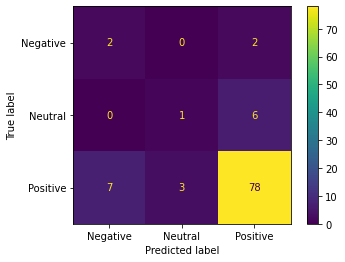

In [17]:
from sklearn.metrics._classification import classification_report
from sklearn.metrics._classification import confusion_matrix
from sklearn.metrics._classification import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
y_actual = df["Actual Polarity"].tolist()
y_predicted = df['Sentiment'].tolist()

confusionMatrix = confusion_matrix(y_actual, y_predicted)
disp = ConfusionMatrixDisplay(confusionMatrix, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot()
print(classification_report(y_actual, y_predicted, labels=['Negative', 'Neutral', 'Positive']))
print()
print(f1_score(y_actual, y_predicted, labels=['Negative', 'Neutral', 'Positive'], average='weighted'))
# plot_confusion_matrix(confusionMatrix, y_actual, y_predicted)